# The Titanic dataset

Here, we will predict whether or not the passenger will survive based on input features in the Titanic situation, taken from Kaggle. We will use "train.csv" for training and testing purposes, using logistic regression with regularization.

In [149]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
print("Printing the first five training examples from the dataset:\n", data.head())
print("The dimensions of the dataset are:", data.shape)

Printing the first five training examples from the dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123      

In [150]:
#It is obvious that some of the features are irrelevant to the regression analysis, namely passengerId, name and ticket
del data['PassengerId'], data['Name'], data['Ticket']
data['Cabin'] = data['Cabin'].fillna('Z')

#For cabin, we can just convert which series of rooms they belonged to, like A, B, C, etc, and the NaN values are replaced with
#Z, and these values will then be mapped to the corresponding number. Other columns need to mapped as well.
for i in range(891):
    string = data['Cabin'][i]
    data['Cabin'][i] = string[0]
for (columnName, columnData) in data.iteritems():
    print(columnName, "y/n for amending:")
    string = input()
    if(string=="y"):
        count = 1
        dictionary = {}
        for i in range(891):
            if(dictionary.get(columnData[i])==None):
                dictionary[columnData[i]] = count
                count += 1
            else: continue
        print(dictionary)
        data[columnName] = data[columnName].replace(dictionary)
print("Final dataset processed:\n", data.head())

C:\Users\SHWETA~1\AppData\Local\Temp/ipykernel_8940/3577349845.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'][i] = string[0]


Survived y/n for amending:
n
Pclass y/n for amending:
n
Sex y/n for amending:
y
{'male': 1, 'female': 2}
Age y/n for amending:
n
SibSp y/n for amending:
n
Parch y/n for amending:
n
Fare y/n for amending:
n
Cabin y/n for amending:
y
{'Z': 1, 'C': 2, 'E': 3, 'G': 4, 'D': 5, 'A': 6, 'B': 7, 'F': 8, 'T': 9}
Embarked y/n for amending:
y
{'S': 1, 'C': 2, 'Q': 3, nan: 4}
Final dataset processed:
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0         0       3    1  22.0      1      0   7.2500      1         1
1         1       1    2  38.0      1      0  71.2833      2         2
2         1       3    2  26.0      0      0   7.9250      1         1
3         1       1    2  35.0      1      0  53.1000      2         1
4         0       3    1  35.0      0      0   8.0500      1         1


In [151]:
#Now that data preprocessing is finished, we can simply split our dataset into training and test set with 80%-20% configuration
#and feature scaling isn't neccessary, as the features are well within each other's range.

print("Checking for any NaN values:", data.isnull().values.any())
data_copy = data.dropna()
print("Checking for any NaN values:", data_copy.isnull().values.any())
print("The amended dimensions are:", data_copy.shape)

train = data_copy[:571]
xtrain = train
ytrain = np.array(xtrain['Survived']).reshape(571, 1)
del xtrain['Survived']
print("The dimensions for training set for features and for survival are:", xtrain.shape, ytrain.shape)
test = data_copy[571:]
xtest = test
ytest = np.array(xtest['Survived']).reshape(143, 1)
del xtest['Survived']
print("The dimensions for training set for features and for survival are:", xtest.shape, ytest.shape)

Checking for any NaN values: True
Checking for any NaN values: False
The amended dimensions are: (714, 9)
The dimensions for training set for features and for survival are: (571, 8) (571, 1)
The dimensions for training set for features and for survival are: (143, 8) (143, 1)


In [152]:
#adding a column of ones to the training set
X0train = np.ones(len(xtrain)).reshape(571, 1)
Xtrain = np.append(X0train, xtrain, axis=1).reshape(571, 9)

In [153]:
#Defining the sigmoid function
e = 2.718281828459045
def sigmoid(a):
    return 1/(1+e**(-a))

#Creating the cost function
def computeCost(X, y, theta):
    J = (-1/m)*((y.transpose() @ np.log10(sigmoid(X @ theta))) + ((1-y).transpose() @ np.log10(sigmoid(1-(X @ theta)))))
    return J[0][0];

In [154]:
#Creating the gradient descent function
alpha = 0.0003
iterations = 10000 #We will run our gradient descent for these iterations
m = 571
theta = np.zeros((9, 1))
print('For theta initialised to zeros the cost is:', computeCost(Xtrain, ytrain, theta))
def gradientDescent(X, y, theta, alpha, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta = theta - ((alpha/m)*(X.transpose() @ ((X @ theta)-y)))
        J_history[iter] = computeCost(X, y, theta)
    return [theta, J_history]

returned = gradientDescent(Xtrain, ytrain, theta, alpha, iterations, m)
theta = returned[0]
J_history = returned[1]

For theta initialised to zeros the cost is: 0.20365873046238722


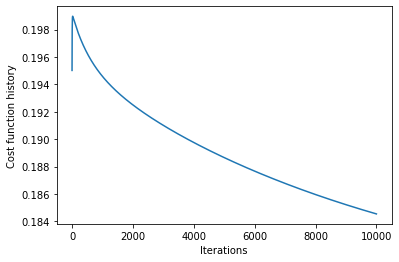

In [155]:
#We will also plot the value of the cost function after each iteration, to see if the value reach a minimum and converge to a
#stabalised value
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(10000), J_history)

In [156]:
#As we can see, the model has converged into a constant value, that means our regression model is created sucessfully.
#Let's compare the results with the actual values.
#We will consider our test set and compare our training model values with the the original.

X0test = np.ones(len(xtest)).reshape(143, 1) #creating the X0 rows on 1s
Xtest = np.append(X0test, xtest, axis=1).reshape(143, 9) #Creating the final X features array
prediction = sigmoid(Xtest @ theta)>0.5
ytest = ytest==1
#print('The values for each of the test set examples in an array is:\n', prediction)
#print('Comparing the original values in our test set:\n', ytest)
print(prediction & ytest)

[[False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 